# Maven Pizza Challenge

Link: https://www.mavenanalytics.io/blog/maven-pizza-challenge

For the Maven Pizza Challenge, you’ll be playing the role of a BI Consultant hired by Plato's Pizza, a Greek-inspired pizza place in New Jersey. You've been hired to help the restaurant use data to improve operations, and just received the following note:

Welcome aboard, we're glad you're here to help!

Things are going OK here at Plato's, but there's room for improvement. We've been collecting transactional data for the past year, but really haven't been able to put it to good use. Hoping you can analyze the data and put together a report to help us find opportunities to drive more sales and work more efficiently.

Here are some questions that we'd like to be able to answer:

- What days and times do we tend to be busiest?
- How many pizzas are we making during peak periods?
- What are our best and worst selling pizzas?
- What's our average order value?
- How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)
- How much money did we make this year? Can we indentify any seasonality in the sales?

That's all I can think of for now, but if you have any other ideas I'd love to hear them – you're the expert!

Thanks in advance,

Mario Maven (Manager, Plato's Pizza)


## Data Dictionary

- order_details_id = Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
- order_id = Unique identifier for each order placed by a table
- pizza_id = Unique identifier for each pizza (constituted by its type and size)
- quantity = Quantity ordered for each pizza of the same type and size
- order_date = Date the order was placed (entered into the system prior to cooking & serving)
- order_time = Time the order was placed (entered into the system prior to cooking & serving)
- pizza_name = Name of the pizza as shown in the menu
- pizza_category = Category that the pizza fall under in the menu (Classic, Chicken, Supreme, or Veggie)
- pizza_ingredients	= Comma-delimited ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
- pizza_size = Size of the pizza (Small, Medium, Large, X Large, or XX Large)
- pizza_price = Price of the pizza in USD

## Table of Contents

* [Data Preprocessing](#Data-Preprocessing)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * [What days and times do we tend to be busiest?](#What-days-and-times-do-we-tend-to-be-busiest?)
    * [How many pizzas are we making during peak periods?](#How-many-pizzas-are-we-making-during-peak-periods?)
    * [What are our best and worst selling pizzas?](#What-are-our-best-and-worst-selling-pizzas?)
    * [What's our average order value?](#What's-our-average-order-value?)
    * [How well are we utilizing our seating capacity? (we have 15 tables and 60 seats)](#How-well-are-we-utilizing-our-seating-capacity?)
    * [How much money did we make this year? Can we indentify any seasonality in the sales?](#How-much-money-did-we-make-this-year?-Can-we-indentify-any-seasonality-in-the-sales?)
    * [What are the most commonly used ingredients in pizza?](#What-are-the-most-commonly-used-ingredients-in-pizza?)
* [Summary](#Summary)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the dataset
df = pd.read_csv(r"C:\Users\ALEX\Desktop\Project\Pizza Sales\SQL\Pizza_combined_dataset.csv")
df.head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   pizza_name         48625 non-null  object 
 7   pizza_category     48625 non-null  object 
 8   pizza_ingredients  48625 non-null  object 
 9   pizza_size         48625 non-null  object 
 10  pizza_price        48625 non-null  float64
dtypes: float64(4), object(7)
memory usage: 4.1+ MB


### Null Values
I found 5 columns with null values in the dataset for the columns **order_details_id, order_id, pizza_id, quantity, order_date, and order_time**. These null values indicate that there were no orders placed for The Big Meat Pizza in M and L sizes, The Five Cheese Pizza in S and M sizes, and The Four Cheese Pizza in S size. Therefore, I will retain the null values in the dataset instead of dropping them.

To avoid errors, I will separate the dataframe into two: one containing the rows with only null values and another containing the rows without null values. After that, I will fill the null values with 0.

In [4]:
null_values = df[df.isnull().any(axis=1)]
null_values

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price
48620,NaN,NaN,NaN,NaN,NaN,NaN,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",M,16.00
48621,NaN,NaN,NaN,NaN,NaN,NaN,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",L,20.50
48622,NaN,NaN,NaN,NaN,NaN,NaN,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",M,15.50
48623,NaN,NaN,NaN,NaN,NaN,NaN,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",S,11.75
48624,NaN,NaN,NaN,NaN,NaN,NaN,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",S,12.50


In [5]:
# Dataframe with only null values
pizza_null = df[df.isnull().any(axis=1)]
pizza_null

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price
48620,NaN,NaN,NaN,NaN,NaN,NaN,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",M,16.00
48621,NaN,NaN,NaN,NaN,NaN,NaN,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",L,20.50
48622,NaN,NaN,NaN,NaN,NaN,NaN,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",M,15.50
48623,NaN,NaN,NaN,NaN,NaN,NaN,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",S,11.75
48624,NaN,NaN,NaN,NaN,NaN,NaN,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",S,12.50


In [6]:
# Filling null values with 0
pizza_null = pizza_null.fillna(0)
pizza_null

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price
48620,0.0,0.0,0,0.0,0,0,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",M,16.00
48621,0.0,0.0,0,0.0,0,0,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau...",L,20.50
48622,0.0,0.0,0,0.0,0,0,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",M,15.50
48623,0.0,0.0,0,0.0,0,0,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",S,11.75
48624,0.0,0.0,0,0.0,0,0,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",S,12.50


In [7]:
# Dataframe without null values
pizza = df[~df.isnull().any(axis=1)]
pizza

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00
...,...,...,...,...,...,...,...,...,...,...,...
48615,48616.0,21348.0,ckn_alfredo_m,1.0,2015-12-31,21:23:10,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75
48616,48617.0,21348.0,four_cheese_l,1.0,2015-12-31,21:23:10,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95
48617,48618.0,21348.0,napolitana_s,1.0,2015-12-31,21:23:10,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00
48618,48619.0,21349.0,mexicana_l,1.0,2015-12-31,22:09:54,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25


### Changing Data Types

In [8]:
pizza['order_date'] = pd.to_datetime(pizza['order_date']) 
pizza['order_details_id'] = pizza['order_details_id'].astype(int) # Remove floating-point
pizza['order_id'] = pizza['order_id'].astype(int) # Remove floating-point
pizza['quantity'] = pizza['quantity'].astype(int) # Remove floating-point

In [9]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int32         
 1   order_id           48620 non-null  int32         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int32         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   pizza_name         48620 non-null  object        
 7   pizza_category     48620 non-null  object        
 8   pizza_ingredients  48620 non-null  object        
 9   pizza_size         48620 non-null  object        
 10  pizza_price        48620 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int32(3), object(6)
memory usage: 3.9+ MB


In [10]:
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00


### Checking Duplicates
**There are no duplicate data.**

In [11]:
duplicates = pizza[pizza.duplicated()]
duplicates

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price


## Exploratory Data Analysis

### What days and times do we tend to be busiest?

In [12]:
# Extract day, month, and year from order_date column
pizza['day'] = pizza['order_date'].dt.day_name()
pizza['month'] = pizza['order_date'].dt.strftime('%B')
pizza['year'] = pizza['order_date'].dt.year

In [13]:
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,Thursday,January,2015
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,Thursday,January,2015
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,Thursday,January,2015
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,Thursday,January,2015
4,5,2,mexicana_m,1,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,Thursday,January,2015


In [14]:
pizza['day'].value_counts()

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: day, dtype: int64

**Friday is the busiest day.**

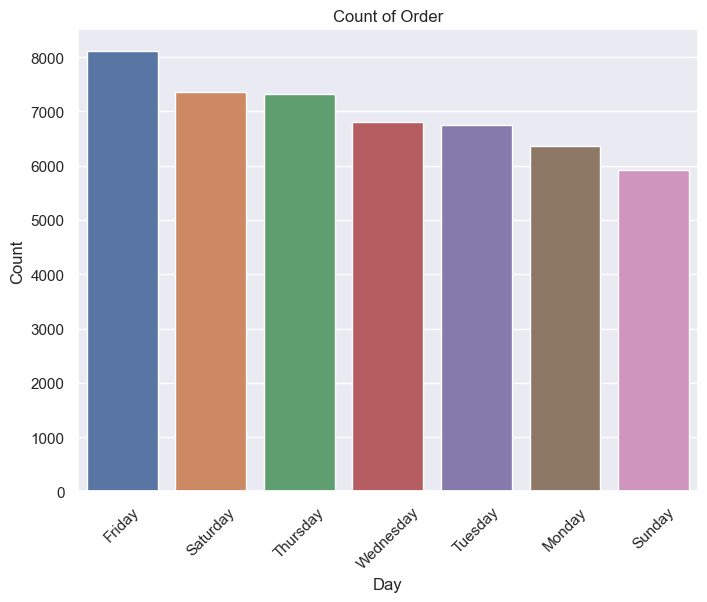

In [15]:
day_counts = pizza['day'].value_counts()

# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)

# Customize the plot
plt.title("Count of Order")
plt.xlabel("Day")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotate the x label
plt.show()

In [16]:
pizza['month'].value_counts()

July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: month, dtype: int64

**July has the highest number of orders.**

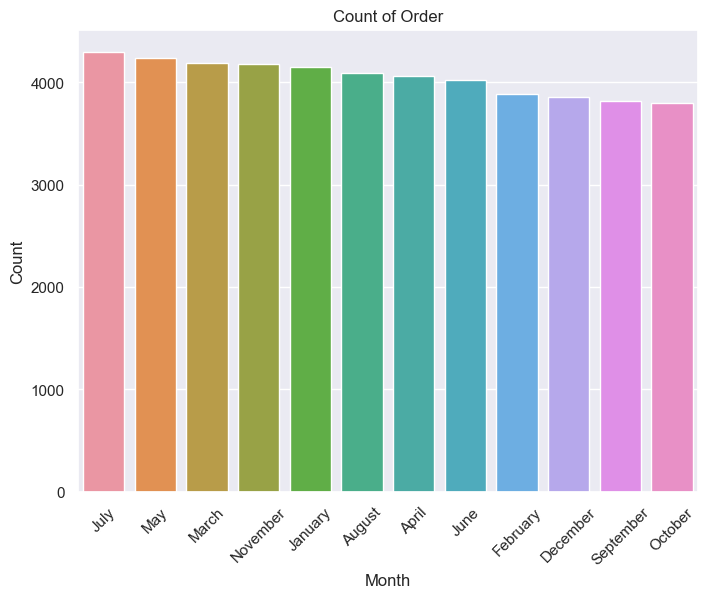

In [17]:
month_counts = pizza['month'].value_counts()

# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)

# Customize the plot
plt.title("Count of Order")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45) # Rotate the x label
plt.show()

In [18]:
pizza['year'].value_counts()

2015    48620
Name: year, dtype: int64

In [19]:
# Extract hour from order_time column
pizza['hour'] = pd.to_datetime(pizza['order_time']).dt.hour

# Select a random sample to verify if the code runs correctly
pizza.sample(n=5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour
46682,46683,20501,pepperoni_s,1,2015-12-14,20:08:46,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",S,9.75,Monday,December,2015,20
7562,7563,3330,soppressata_l,1,2015-02-25,18:58:00,The Soppressata Pizza,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",L,20.75,Wednesday,February,2015,18
26912,26913,11841,the_greek_l,1,2015-07-17,15:58:03,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",L,20.50,Friday,July,2015,15
41824,41825,18399,ckn_pesto_l,1,2015-11-10,13:08:13,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",L,20.75,Tuesday,November,2015,13
42293,42294,18606,mediterraneo_l,1,2015-11-13,19:06:42,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",L,20.25,Friday,November,2015,19


In [20]:
pizza['hour'].value_counts()

12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: hour, dtype: int64

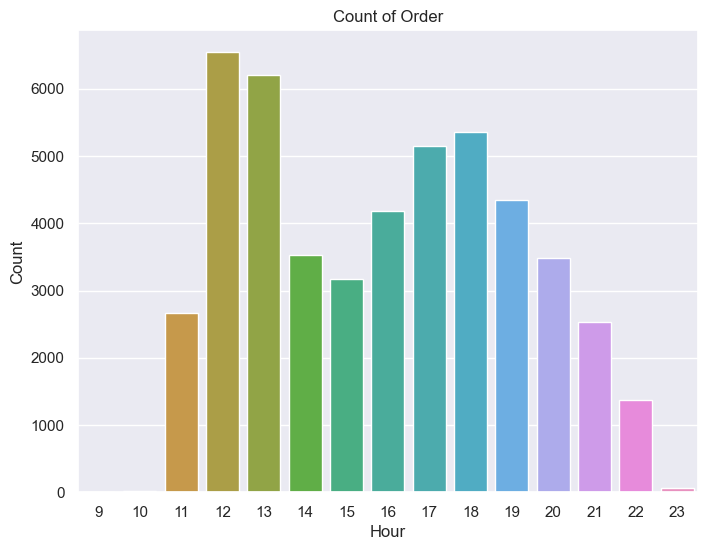

In [21]:
hour_counts = pizza['hour'].value_counts()

# Create a bar plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=hour_counts.index, y=hour_counts.values)

# Customize the plot
plt.title("Count of Order")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

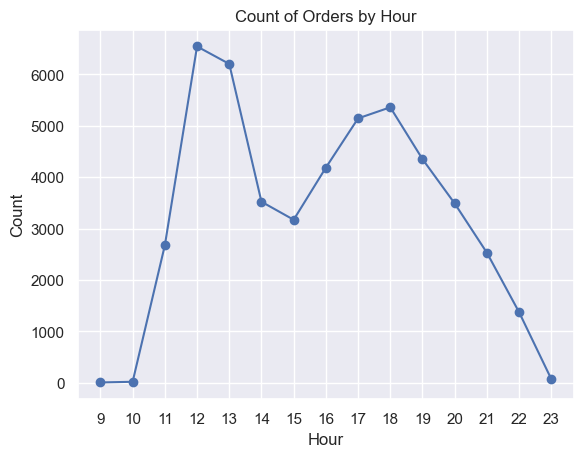

In [22]:
hour_counts = pizza['hour'].value_counts().sort_index()

# Create the line chart
plt.plot(hour_counts.index, hour_counts.values, marker='o')

# Customize the plot
plt.title('Count of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(hour_counts.index)
plt.show()

**Although the pizza store opens at 9, the orders spike between 12 and 13 due to it being lunchtime. After 13, the number of orders gradually declines, only to spike again between 17 and 18 during dinner hours.**

### How many pizzas are we making during peak periods?

In [23]:
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,Thursday,January,2015,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,Thursday,January,2015,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,Thursday,January,2015,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,Thursday,January,2015,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,Thursday,January,2015,11


**I am filtering the data to include only entries considered as peak hours, and then I am summing the quantity for each filtered entry.**

In [24]:
filtered_data_peak = pizza[(pizza['hour'] == 12) | (pizza['hour'] == 13) | (pizza['hour'] == 17) | (pizza['hour'] == 18)]
sum_quantity = filtered_data_peak['quantity'].sum()
sum_quantity

23817

**We are making a total of 23,817 pizzas during peak periods. Then, I would like to know the average number of pizzas we make during each peak period.**

In [25]:
filtered_data_lunch = pizza[(pizza['hour'] == 12) | (pizza['hour'] == 13)]
total_quantity_lunch = filtered_data_lunch.groupby('order_date')['quantity'].sum()
total_quantity_lunch.mean()

36.840782122905026

**On average, we make 36 pizzas between 12 and 13.**

In [26]:
filtered_data_dinner = pizza[(pizza['hour'] == 17) | (pizza['hour'] == 18)]
total_quantity_dinner = filtered_data_dinner.groupby('order_date')['quantity'].sum()
total_quantity_dinner.mean()

29.687150837988828

**On average, we make 29 pizzas between 17 and 18.**

### What are our best and worst selling pizzas?

In [27]:
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,Thursday,January,2015,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,Thursday,January,2015,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,Thursday,January,2015,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,Thursday,January,2015,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,Thursday,January,2015,11


In [28]:
# Group the data by 'pizza_id' and calculate the sum of the 'quantity' values for each group
total_pizza_id = pizza.groupby('pizza_id')['quantity'].sum()
total_pizza_id.sort_values(ascending=False)

pizza_id
big_meat_s        1914
thai_ckn_l        1410
five_cheese_l     1409
four_cheese_l     1316
classic_dlx_m     1181
                  ... 
mexicana_s         162
calabrese_s         99
ckn_alfredo_s       96
green_garden_l      95
the_greek_xxl       28
Name: quantity, Length: 91, dtype: int32

**Based on pizza_id, our best selling pizza is 'big_meat_s', while our worst selling pizza is 'the_greek_xxl'**

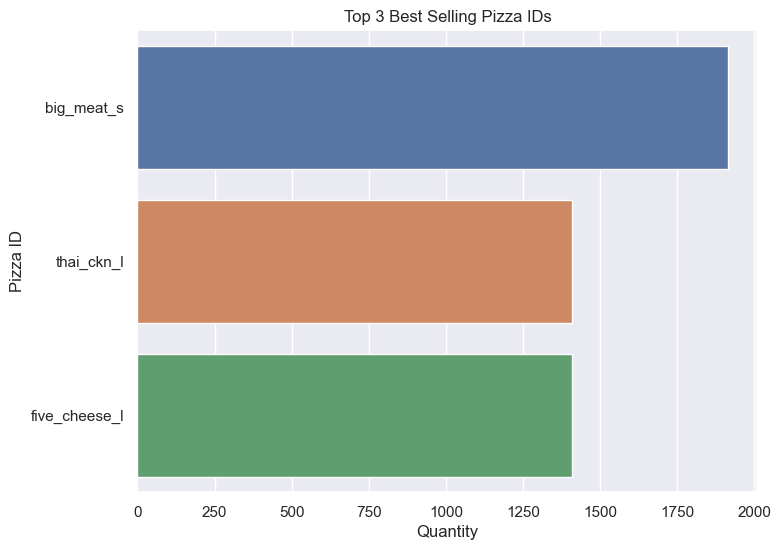

In [29]:
top_3_best_pizza_ids = total_pizza_id.sort_values(ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_best_pizza_ids.values, y=top_3_best_pizza_ids.index, orient='h')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Pizza ID')
plt.title('Top 3 Best Selling Pizza IDs')
plt.show()

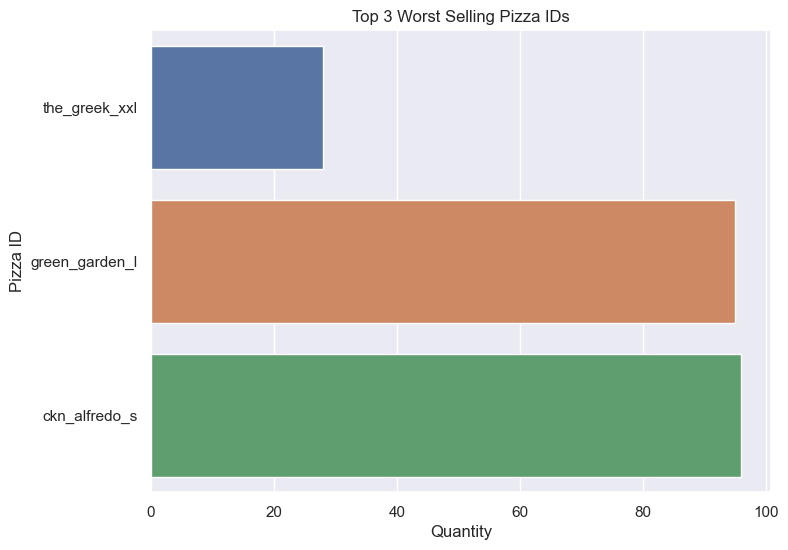

In [30]:
top_3_worst_pizza_ids = total_pizza_id.sort_values(ascending=True).head(3)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_worst_pizza_ids.values, y=top_3_worst_pizza_ids.index, orient='h')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Pizza ID')
plt.title('Top 3 Worst Selling Pizza IDs')
plt.show()

In [31]:
# Group the data by 'pizza_name' and calculate the sum of the 'quantity' values for each group
total_pizza_name = pizza.groupby('pizza_name')['quantity'].sum()
total_pizza_name.sort_values(ascending=False)

pizza_name
The Classic Deluxe Pizza                      2453
The Barbecue Chicken Pizza                    2432
The Hawaiian Pizza                            2422
The Pepperoni Pizza                           2418
The Thai Chicken Pizza                        2371
The California Chicken Pizza                  2370
The Sicilian Pizza                            1938
The Spicy Italian Pizza                       1924
The Southwest Chicken Pizza                   1917
The Big Meat Pizza                            1914
The Four Cheese Pizza                         1902
The Italian Supreme Pizza                     1884
The Vegetables + Vegetables Pizza             1526
The Mexicana Pizza                            1484
The Napolitana Pizza                          1464
The Prosciutto and Arugula Pizza              1457
The Spinach and Feta Pizza                    1446
The Pepper Salami Pizza                       1446
The Italian Capocollo Pizza                   1438
The Greek Pizza     

**Based on pizza_name, our best selling pizza is 'The Classic Deluxe Pizza', while our worst selling pizza is 'The Brie Carre Pizza'**

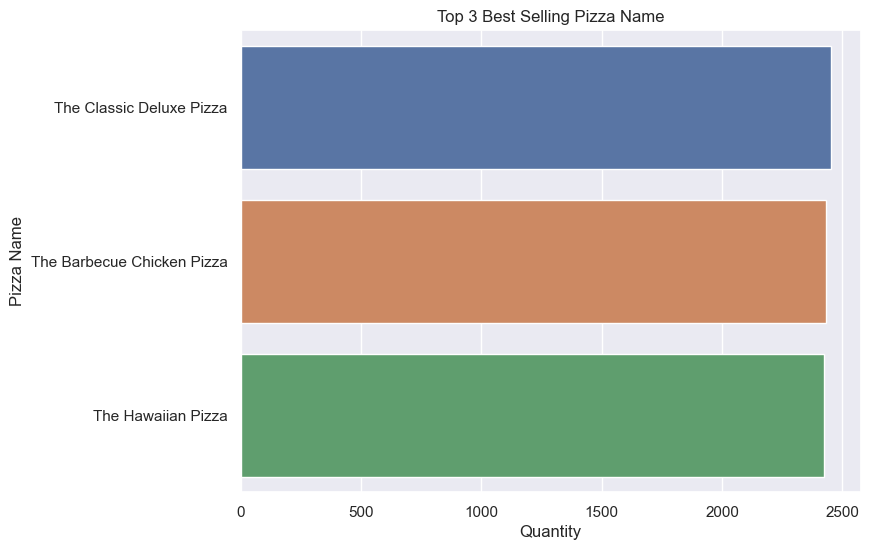

In [32]:
top_3_best_pizza_name = total_pizza_name.sort_values(ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_best_pizza_name.values, y=top_3_best_pizza_name.index, orient='h')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Pizza Name')
plt.title('Top 3 Best Selling Pizza Name')
plt.show()

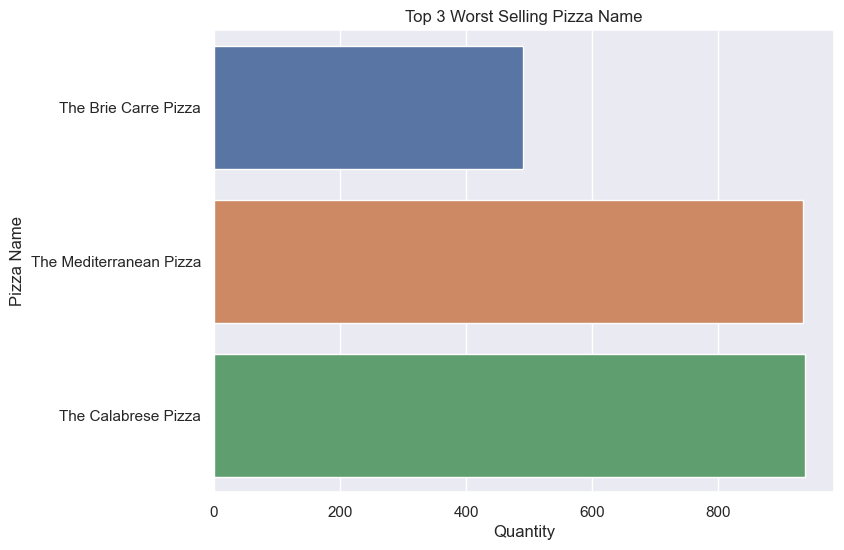

In [33]:
top_3_worst_pizza_name = total_pizza_name.sort_values(ascending=True).head(3)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_worst_pizza_name.values, y=top_3_worst_pizza_name.index, orient='h')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Pizza Name')
plt.title('Top 3 Worst Selling Pizza Name')
plt.show()

In [34]:
# Group the data by 'pizza_category' and calculate the sum of the 'quantity' values for each group
total_pizza_category = pizza.groupby('pizza_category')['quantity'].sum()
total_pizza_category.sort_values(ascending=False)

pizza_category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int32

**Based on pizza_category, our best selling pizza is 'Classic', while our worst selling pizza is 'Chicken', although the difference is not significant**

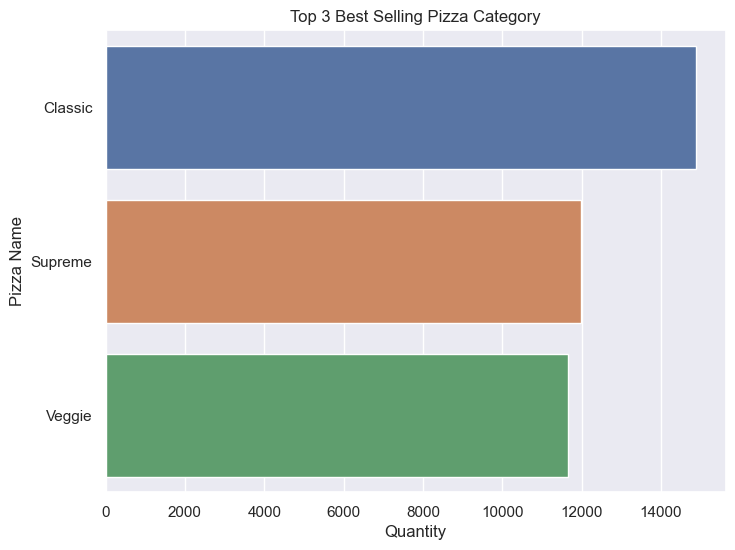

In [35]:
top_3_best_pizza_category = total_pizza_category.sort_values(ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_best_pizza_category.values, y=top_3_best_pizza_category.index, orient='h')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Pizza Name')
plt.title('Top 3 Best Selling Pizza Category')
plt.show()

In [36]:
# Group the data by 'pizza_size' and calculate the sum of the 'quantity' values for each group
total_pizza_size = pizza.groupby('pizza_size')['quantity'].sum()
total_pizza_size.sort_values(ascending=False)

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int32

**Based on pizza_size, our best selling pizza is 'L', while our worst selling pizza is 'XXL'**

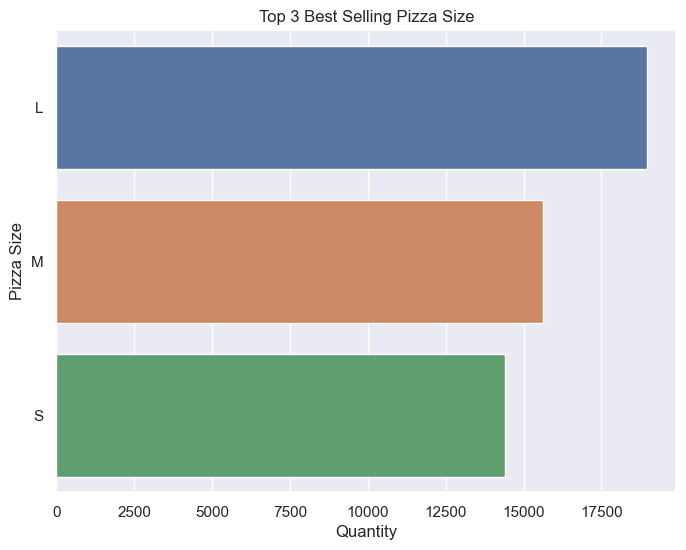

In [37]:
top_3_best_pizza_size = total_pizza_size.sort_values(ascending=False).head(3)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_3_best_pizza_size.values, y=top_3_best_pizza_size.index, orient='h')

# Customize the plot
plt.xlabel('Quantity')
plt.ylabel('Pizza Size')
plt.title('Top 3 Best Selling Pizza Size')
plt.show()

### What's our average order value?

In [38]:
pizza.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,Thursday,January,2015,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,Thursday,January,2015,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,Thursday,January,2015,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,Thursday,January,2015,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,Thursday,January,2015,11


In [39]:
# Create a new column named 'total_price'
pizza['total_price'] = pizza['quantity'] * pizza['pizza_price']

# Check if the code works properly
pizza[pizza['quantity'] > 1].head(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour,total_price
48,49,17,mediterraneo_m,2,2015-01-01,13:53:00,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",M,16.00,Thursday,January,2015,13,32.00
183,184,78,spicy_ital_l,3,2015-01-02,12:28:14,The Spicy Italian Pizza,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",L,20.75,Friday,January,2015,12,62.25
211,212,91,bbq_ckn_l,2,2015-01-02,15:14:43,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",L,20.75,Friday,January,2015,15,41.50
222,223,92,the_greek_m,2,2015-01-02,15:17:02,The Greek Pizza,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic...",M,16.00,Friday,January,2015,15,32.00
245,246,105,hawaiian_s,2,2015-01-02,18:12:01,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",S,10.50,Friday,January,2015,18,21.00


In [40]:
# Group the data by 'order_id' and calculate the sum of the 'total_price' values for each group. Then, calculate the mean of the summed values
total_price_order = pizza.groupby('order_id')['total_price'].sum()
total_price_order.mean()

38.30726229508196

**Our average order value is 38 USD.**

### How well are we utilizing our seating capacity?
**Note: we have 15 tables and 60 seats.**

**To answer this question, we will assume that each order at Plato's Pizza corresponds to one table and analyze the seating capacity utilization on a typical Friday in July, the busiest month and day.**

In [41]:
filtered_data_peak_date = pizza[(pizza['month'] == 'July') & (pizza['day'] == 'Friday')]
filtered_data_peak_date

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour,total_price
24834,24835,10925,sicilian_s,1,2015-07-03,11:19:05,The Sicilian Pizza,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",S,12.25,Friday,July,2015,11,12.25
24835,24836,10925,spinach_fet_l,1,2015-07-03,11:19:05,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",L,20.25,Friday,July,2015,11,20.25
24836,24837,10925,spinach_supr_s,1,2015-07-03,11:19:05,The Spinach Supreme Pizza,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti...",S,12.50,Friday,July,2015,11,12.50
24837,24838,10926,pepperoni_m,1,2015-07-03,11:36:17,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",M,12.50,Friday,July,2015,11,12.50
24838,24839,10927,pepperoni_m,1,2015-07-03,11:46:22,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",M,12.50,Friday,July,2015,11,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28861,28862,12727,spinach_supr_s,1,2015-07-31,22:05:12,The Spinach Supreme Pizza,Supreme,"Spinach, Red Onions, Pepperoni, Tomatoes, Arti...",S,12.50,Friday,July,2015,22,12.50
28862,28863,12728,napolitana_s,1,2015-07-31,22:18:45,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,Friday,July,2015,22,12.00
28863,28864,12729,ital_supr_m,1,2015-07-31,22:25:10,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",M,16.50,Friday,July,2015,22,16.50
28864,28865,12729,pepperoni_s,1,2015-07-31,22:25:10,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni",S,9.75,Friday,July,2015,22,9.75


**Friday, June 3**

In [42]:
filtered_data_peak_date1 = pizza[(pizza['order_date'] == '2015-07-03')]
hourly_order_counts = filtered_data_peak_date1.groupby('hour')['order_id'].nunique()
hourly_order_counts

hour
11     6
12     9
13     9
14     5
15     6
16     5
17     8
18     8
19     8
20    13
21     9
22     7
Name: order_id, dtype: int64

**Friday, June 10**

In [43]:
filtered_data_peak_date1 = pizza[(pizza['order_date'] == '2015-07-10')]
hourly_order_counts = filtered_data_peak_date1.groupby('hour')['order_id'].nunique()
hourly_order_counts

hour
11    4
12    9
13    7
14    6
15    7
16    4
17    4
18    9
19    6
20    5
21    3
22    7
Name: order_id, dtype: int64

**Friday, June 17**

In [44]:
filtered_data_peak_date1 = pizza[(pizza['order_date'] == '2015-07-17')]
hourly_order_counts = filtered_data_peak_date1.groupby('hour')['order_id'].nunique()
hourly_order_counts

hour
11     3
12     7
13     8
14     7
15     5
16     8
17     5
18     7
19     5
20     8
21    13
22     5
23     1
Name: order_id, dtype: int64

**Friday, June 24**

In [45]:
filtered_data_peak_date1 = pizza[(pizza['order_date'] == '2015-07-24')]
hourly_order_counts = filtered_data_peak_date1.groupby('hour')['order_id'].nunique()
hourly_order_counts

hour
11     7
12     7
13     6
14     5
15     2
16     3
17     8
18    18
19     6
20     4
21     5
22     4
Name: order_id, dtype: int64

**Friday, June 31**

In [46]:
filtered_data_peak_date1 = pizza[(pizza['order_date'] == '2015-07-31')]
hourly_order_counts = filtered_data_peak_date1.groupby('hour')['order_id'].nunique()
hourly_order_counts

hour
11     4
12     4
13    11
14     4
15     6
16     8
17     2
18     7
19     9
20     7
21     2
22     4
Name: order_id, dtype: int64

**Overall, Plato's Pizza is doing a good job at utilizing their tables, especially during peak hours. However, it appears that their capacity was overloaded on June 24 at 6pm.**

### How much money did we make this year? Can we indentify any seasonality in the sales?

In [47]:
pizza

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,pizza_name,pizza_category,pizza_ingredients,pizza_size,pizza_price,day,month,year,hour,total_price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,Thursday,January,2015,11,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",M,16.00,Thursday,January,2015,11,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",L,18.50,Thursday,January,2015,11,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",L,20.75,Thursday,January,2015,11,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",M,16.00,Thursday,January,2015,11,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",M,16.75,Thursday,December,2015,21,16.75
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",L,17.95,Thursday,December,2015,21,17.95
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",S,12.00,Thursday,December,2015,21,12.00
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",L,20.25,Thursday,December,2015,22,20.25


In [48]:
pizza['total_price'].sum()

817860.05

**We made a total of 817,860.05 USD in 2015.**

In [49]:
total_price_date = pizza.groupby('order_date')['total_price'].sum().reset_index()
total_price_date

,order_date,total_price
0,2015-01-01,2713.85
1,2015-01-02,2731.90
2,2015-01-03,2662.40
3,2015-01-04,1755.45
4,2015-01-05,2065.95
...,...,...
353,2015-12-27,1419.00
354,2015-12-28,1637.20
355,2015-12-29,1353.25
356,2015-12-30,1337.80


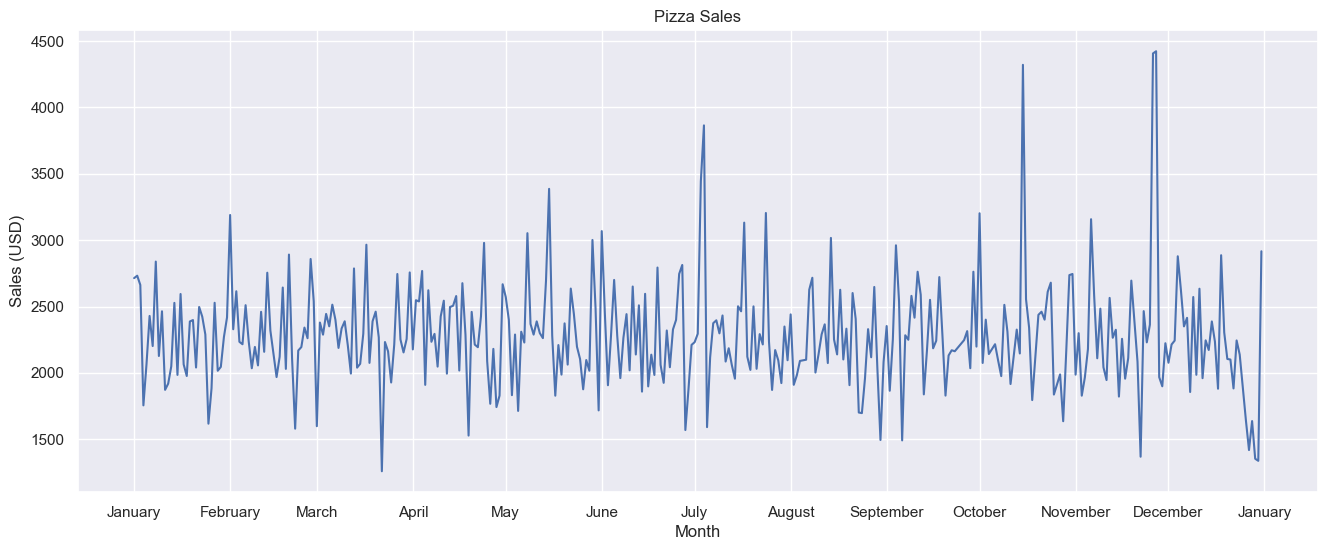

In [50]:
from datetime import datetime
import matplotlib.dates as mdates

# Create a line chart
plt.figure(figsize=(16, 6))
plt.plot(total_price_date['order_date'], total_price_date['total_price'])

# Customize the x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Sales (USD)')
plt.title('Pizza Sales')
plt.show()

**It's hard to identify any clear seasonality patterns with only one year of data. However, we can observe sales spikes in early July, mid-October, and late November. These spikes in sales are potentially due to the holiday season or promotions like Black Friday.**

### What are the most commonly used ingredients in pizza?

In [51]:
from collections import Counter

# Split the ingredients string into individual ingredients
pizza['pizza_ingredients'] = pizza['pizza_ingredients'].str.split(', ')

# Create a list of all ingredients
all_ingredients = [ingredient for ingredients_list in pizza['pizza_ingredients'] for ingredient in ingredients_list]

# Count the occurrences of each ingredient
ingredient_counts = Counter(all_ingredients)

# Sort the ingredient counts in descending order
sorted_ingredient_counts = sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True)
sorted_ingredient_counts

[('Garlic', 27422),
 ('Tomatoes', 26601),
 ('Red Onions', 19547),
 ('Red Peppers', 16284),
 ('Mozzarella Cheese', 10333),
 ('Pepperoni', 10300),
 ('Spinach', 10012),
 ('Mushrooms', 9624),
 ('Chicken', 8443),
 ('Capocollo', 6572),
 ('Green Olives', 6174),
 ('Artichokes', 5682),
 ('Jalapeno Peppers', 5643),
 ('Green Peppers', 5224),
 ('Feta Cheese', 4748),
 ('Pineapple', 4685),
 ('Bacon', 4227),
 ('Asiago Cheese', 3342),
 ('Cilantro', 3341),
 ('Corn', 3341),
 ('Chipotle Sauce', 3341),
 ('Goat Cheese', 3301),
 ('Kalamata Olives', 3269),
 ('Fontina Cheese', 3259),
 ('Pesto Sauce', 2893),
 ('Zucchini', 2485),
 ('Barbecued Chicken', 2372),
 ('Barbecue Sauce', 2372),
 ('Sliced Ham', 2370),
 ('Thai Sweet Chilli Sauce', 2315),
 ('Artichoke', 2302),
 ('Gouda Cheese', 2302),
 ('Peperoncini verdi', 1887),
 ('Coarse Sicilian Salami', 1887),
 ('Luganega Sausage', 1887),
 ('Onions', 1887),
 ('Sun-dried Tomatoes', 1880),
 ('Ricotta Cheese', 1850),
 ('Gorgonzola Piccante Cheese', 1850),
 ('Parmigiano R

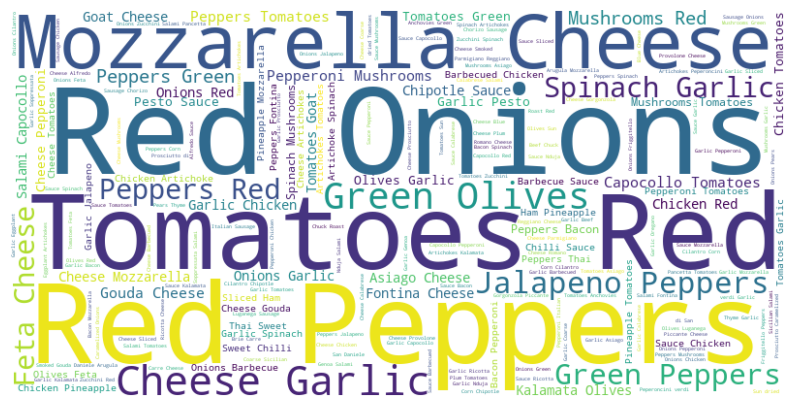

In [52]:
from wordcloud import WordCloud

# Combine all the ingredients into a single string
all_ingredients = ' '.join(pizza['pizza_ingredients'].apply(', '.join))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients)

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Top 5 ingredients that most commonly appear in pizza are garlic, tomatoes, red onions, red peppers, and mozzarella.**

## Summary

- Friday is the busiest day.
- July has the highest number of orders.
- Although the pizza store opens at 9, the orders spike between 12 and 13 due to it being lunchtime. After 13, the number of orders gradually declines, only to spike again between 17 and 18 during dinner hours.
- We are making a total of 23,817 pizzas during peak periods (12-13, 17-18).
- On average, we make 36 pizzas between 12 and 13.
- On average, we make 29 pizzas between 17 and 18.
- Based on pizza_id, our best selling pizza is 'big_meat_s', while our worst selling pizza is 'the_greek_xxl'.
- Based on pizza_name, our best selling pizza is 'The Classic Deluxe Pizza', while our worst selling pizza is 'The Brie Carre Pizza'.
- Based on pizza_category, our best selling pizza is 'Classic', while our worst selling pizza is 'Chicken', although the difference is not significant.
- Based on pizza_size, our best selling pizza is 'L', while our worst selling pizza is 'XXL'.
- Our average order value is 38 USD.
- Overall, Plato's Pizza is doing a good job at utilizing their tables, especially during peak hours. However, it appears that their capacity was overloaded on June 24 at 6pm.
- We made a total of 817,860.05 USD in 2015.
- It's hard to identify any clear seasonality patterns with only one year of data. However, we can observe sales spikes in early July, mid-October, and late November. These spikes in sales are potentially due to the holiday season or promotions like Black Friday.
- Top 5 ingredients that most commonly appear in pizza are garlic, tomatoes, red onions, red peppers, and mozzarella.
- There were no orders placed for The Big Meat Pizza in M and L sizes, The Five Cheese Pizza in S and M sizes, and The Four Cheese Pizza in S size.

In [53]:
# Export the dataframe
pizza.to_csv('pizza_EDA.csv', index=False)